In [17]:
import numpy as np
import time
from matplotlib import pyplot as plt

In [2]:
def fill(s):
    while len(s) < 5:
        s = '0'+ s
    return s

def convert_to_b(w):
    return dic1[w]

def convert_to_w(b):
    return dic2[b]

def flip_bit(b):
    if b == '1':
        return '0'
    return '1'

def BSC(m, e):
    m = list(m)
    for i in range(len(m)):
        if np.random.random() < e:
            m[i] = flip_bit(m[i])
    return ''.join(m)

def count_diff(m1,m2):
    d = 0
    for i in range(len(m1)):
        if m1[i] != m2[i]:
            d = d + 1
    return d

def multiply_message(m,t):# multiply message m, t times
    m_ = ''
    for i in range(len(m)):
        for _ in range(t):
            m_ = m_ + m[i]
    return m_

def compute_avg(m):# computes majority vote of substring
    c_0 = 0
    c_1 = 1
    for i in m:
        if i == '0':
            c_0 = c_0 + 1
        else:
            c_1 = c_1 + 1
    if c_0 > c_1:
        return '0'
    return '1'
    
def recreate_mltiplied_message(m,t):# computes message from multiplied trasnmited message
    i = 0
    m_r = ''
    while i < len(m):
        m_r = m_r + compute_avg(m[i:i+t])
        i = i + t
    return m_r

def exercice_2(m,t):
    start = time.time()
    m_1 = multiply_message(m,t)
    m_2 = BSC(m_1, 0.1)
    m_3 = recreate_mltiplied_message(m_2, t)
    end = time.time() - start
    message_m_l = []
    i = 0
    while i < len(m_3):
        message_m_l.append(convert_to_w(m_3[i:i+5]))
        i = i + 5
    return message_m_l, end

2 dictionaries: 
 
1st with keys that represent words, and values their binary representation of words 

2dn with keys that represnet binary representation of words , and value the word

In [3]:
# generate alphabet or 32 words, with their binary representation
alphabet = 32
dic1 = {}
dic2 = {}
for i in range(alphabet):
    a = str(i)
    b = fill(bin(i)[2:])
    dic1[a] = b
    dic2[b] = a

# generate message of 1000 random words

In [4]:
# generate string of 1000 words
t_message = 1000
message = []
message_b = ''
for i in range(t_message):
    word = str(np.random.randint(0, len(dic1.keys())))
    message.append(word)
    message_b = message_b + convert_to_b(word)
print(len(message))
print(len(message_b))

1000
5000


In [5]:
# compute message sent through 0.1 prob error rate channel
message_b_e = BSC(message_b, 0.1)
print(len(message_b_e))
e_ = count_diff(message_b,message_b_e)
print(e_,"errors -> ", e_/len(message_b_e), "%")

5000
448 errors ->  0.0896 %


### 1: amount of wrong words in message

In [6]:
message_e = []
i = 0
while i < len(message_b_e):
    message_e.append(convert_to_w(message_b_e[i:i+5]))
    i = i + 5

In [7]:
error = count_diff(message,message_e)
print(error, "wrong words")

386 wrong words


### 2: 'multiply' a message

In [8]:
message_b_3 = multiply_message(message_b,3)
message_b_3_e = BSC(message_b_3, 0.1)
message_b_3_e = recreate_mltiplied_message(message_b_3_e, 3)

In [9]:
message_m_e = []
i = 0
while i < len(message_b_3_e):
    message_m_e.append(convert_to_w(message_b_3_e[i:i+5]))
    i = i + 5

In [10]:
error = count_diff(message,message_m_e)
print(error, "wrong words")

521 wrong words


### 3: do exercice 2, with different values (5,11,23)

In [11]:
rates = [3,5,11,23]
res = []
for i in rates:
    message_res, _ = exercice_2(message_b, i)
    res.append(count_diff(message,message_res))

In [12]:
print(res)

[525, 169, 10, 0]


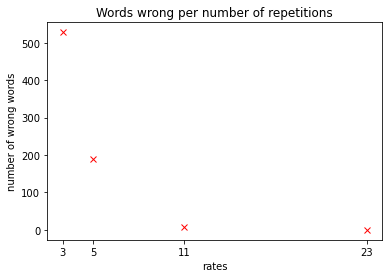

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Words wrong per number of repetitions')

# Setting X-axis and Y-axis labels
ax.set_ylabel('number of wrong words')
ax.set_xlabel('rates')
ax.set_xticks(rates)
plt.plot(rates, res, 'rx')
# Showing the plot
plt.show()

### 4: do exercice 3, with time

In [13]:
rates = [3,5,11,23]
res = []
time_ = []
for i in rates:
    message_res, t = exercice_2(message_b, i)
    res.append(count_diff(message,message_res))
    time_.append(t)

In [14]:
print(res)
print(time_)

[528, 189, 8, 0]
[0.012964725494384766, 0.020971298217773438, 0.04087185859680176, 0.07382965087890625]


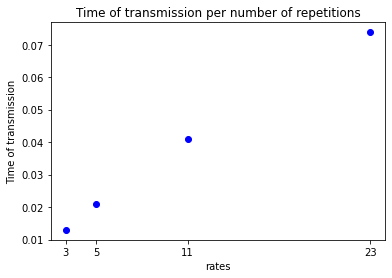

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Time of transmission per number of repetitions')

# Setting X-axis and Y-axis labels
ax.set_ylabel('Time of transmission')
ax.set_xlabel('rates')
ax.set_xticks(rates)
plt.plot(rates, time_, 'bo')
# Showing the plot
plt.show()

### 5: rate of communication

In [15]:
R = np.log(32)/5

In [16]:
print(R)

0.6931471805599453
